# Zadanie 14.5 - Pingwiny

#### import nizbednych bibliotek

In [3]:
import pandas as pd
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV

## Eksploracyjna analiza danych

#### Wczytujemy dane i sprawdzamy co znajdujduje się pod zmienną penguins za pomoca info(). Widać że mamy pięć różnych kolumn z danymi oraz że mamy 342 wpisy dla pierwszych 4 kolumn i 344 wpisy dla ostatniej kolumny. To znaczy że mamy jakieś brakujące wpisy które należy odszukać. Przy tej ilości danych i ilości brakujących wpisów można je po prostu usunąć.

In [6]:
penguins = pd.read_csv('penguins.csv')
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CulmenLength   342 non-null    float64
 1   CulmenDepth    342 non-null    float64
 2   FlipperLength  342 non-null    float64
 3   BodyMass       342 non-null    float64
 4   Species        344 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 13.6 KB


#### Zlokalizowano brakujące wpisy w wierszach o indeksie 2 i 271. 

In [8]:
penguins[penguins['CulmenLength'].isnull()==True]

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
3,NaN,NaN,NaN,NaN,0
271,NaN,NaN,NaN,NaN,1


#### Usuwamy brakujące dane

In [10]:
penguins.dropna(inplace=True)

#### Przypisujemy dane odpowiednio do X i do y. Naszymi labelkami są dane z kolumny Species które bedziemy używać jako y, Pozostałe kolumny to X 

In [12]:
features = ['CulmenLength','CulmenDepth','FlipperLength','BodyMass']
target = 'Species'
X, y = penguins[features], penguins[target]
print('X:')
display(X)
print('\ny:')
display(y)

X:


,CulmenLength,CulmenDepth,FlipperLength,BodyMass
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0
...,...,...,...,...
339,55.8,19.8,207.0,4000.0
340,43.5,18.1,202.0,3400.0
341,49.6,18.2,193.0,3775.0
342,50.8,19.0,210.0,4100.0



y:


0      0
1      0
2      0
4      0
5      0
      ..
339    2
340    2
341    2
342    2
343    2
Name: Species, Length: 342, dtype: int64

#### Sprawdzamy czy dane sa zbalansowane, czyli czy każda grupa z kolumny species ma podobną ilość wpisów. widzy że dane nie są dobrze zbalansowane gdyż grupa 0 jest ponad dwukrotnie liczniejsza niż grupa 2

In [14]:
pd.Series(y).value_counts(normalize=True)

Species
0    0.441520
1    0.359649
2    0.198830
Name: proportion, dtype: float64

#### By zwizualizować dane wybieramy stworzenie histogramów dla każdej kolumny osobno z rozdzieleniem danych na poszczególne kategorie z kolumny Species. Dla histogramu "CulmenLength" widać że pinginy  z grupy 0 znacząco różnią się od pozostałych 2 grup gdy mają zacząco krotszą górną długość dziobu, natomiast pingwiny z pierwszej grupy mają znacznie mniejszą grubość dziobu w porównaniu z grupą 0 i 2. Również pingwiny z grupy 1 mają znacząco większą długość płetwy w porównaniu z pinginami z grup 0 i 2. Jeśli chodzi i masę ciała pingwinów to dla grup 0 i 1 jest porównywalna, natomiast dla grupy 1 jest zdecydowanie wieksza. Na podstawie tych danych możemy stwierdzić iż każda z kolumn ze zmiennej penguins może być wartościowa w celu identyfikacji gatunku pingwina. 

C:\Users\piotr\AppData\Local\Temp\ipykernel_13688\3135980277.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(penguins.loc[penguins['Species']==0, col], kde=True, color='green', label='Pingwin grupy 0')
C:\Users\piotr\AppData\Local\Temp\ipykernel_13688\3135980277.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750b

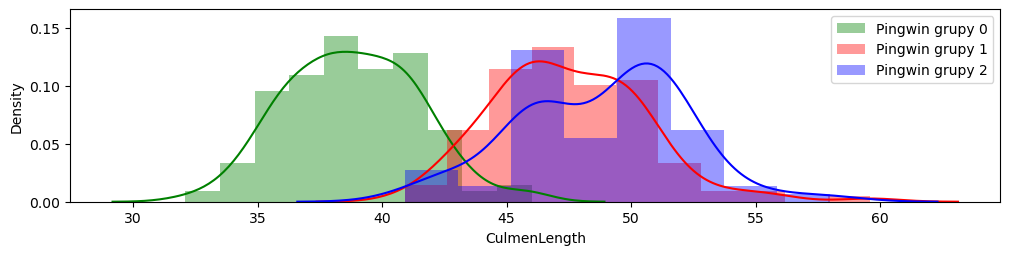

C:\Users\piotr\AppData\Local\Temp\ipykernel_13688\3135980277.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(penguins.loc[penguins['Species']==0, col], kde=True, color='green', label='Pingwin grupy 0')
C:\Users\piotr\AppData\Local\Temp\ipykernel_13688\3135980277.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750b

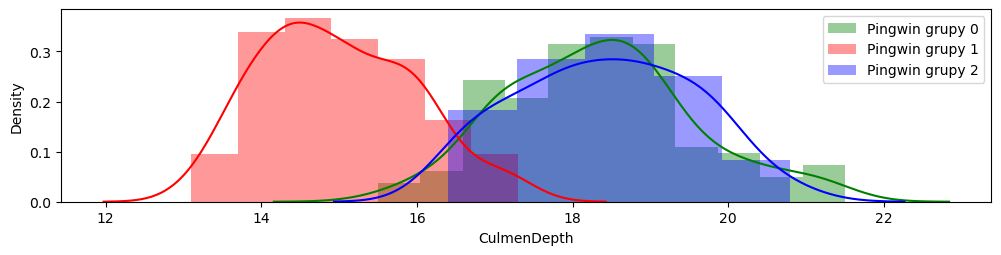

C:\Users\piotr\AppData\Local\Temp\ipykernel_13688\3135980277.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(penguins.loc[penguins['Species']==0, col], kde=True, color='green', label='Pingwin grupy 0')
C:\Users\piotr\AppData\Local\Temp\ipykernel_13688\3135980277.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750b

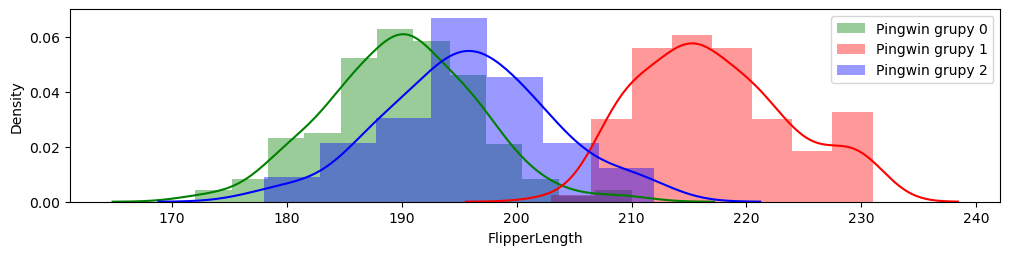

C:\Users\piotr\AppData\Local\Temp\ipykernel_13688\3135980277.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(penguins.loc[penguins['Species']==0, col], kde=True, color='green', label='Pingwin grupy 0')
C:\Users\piotr\AppData\Local\Temp\ipykernel_13688\3135980277.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750b

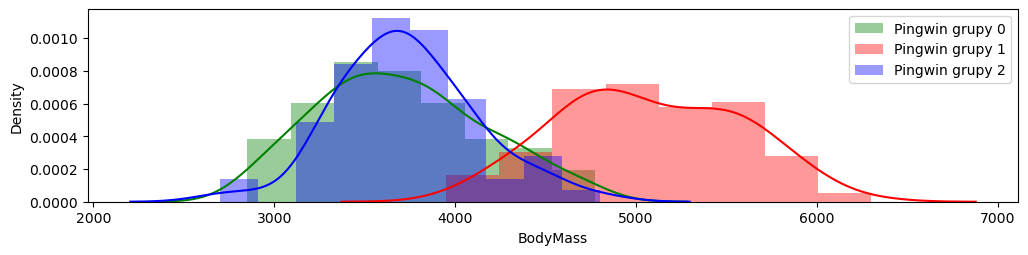

In [16]:
for col in features:
    plt.figure(figsize=(12, 2.5))
    sns.distplot(penguins.loc[penguins['Species']==0, col], kde=True, color='green', label='Pingwin grupy 0')
    sns.distplot(penguins.loc[penguins['Species']==1, col], kde=True, color='red', label='Pingwin grupy 1')
    sns.distplot(penguins.loc[penguins['Species']==2, col], kde=True, color='blue', label='Pingwin grupy 2')
    plt.legend(loc='upper right')
    plt.show()

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0, stratify=y)

In [18]:
scaler_2var = StandardScaler()
X_train_standardized = scaler_2var.fit_transform(X_train)
X_test_standardized = scaler_2var.transform(X_test)

In [19]:
metrics_dataframe = pd.DataFrame(columns = ['Description', 'F1_score TRAIN', 'F1_score TEST'])

## Nauka i testowanie poszczególnych modeli poznanych w tym rozdziale

#### LogisticRegression

In [22]:
model = LogisticRegression()
model.fit(X_train_standardized, y_train)
predictions_test = model.predict(X_test_standardized)
predictions_train = model.predict(X_train_standardized)

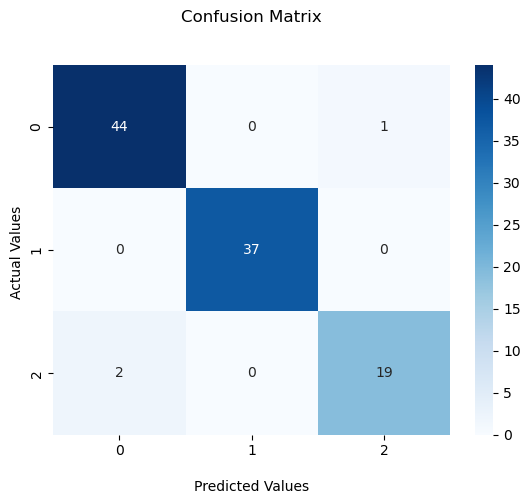

LogisticRegression F1_score Train: 0.9958
LogisticRegression F1_score Test: 0.9709


C:\Users\piotr\AppData\Local\Temp\ipykernel_13688\1893501041.py:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  metrics_dataframe = pd.concat([metrics_dataframe, pd.DataFrame.from_dict({'Description': ["LogisticRegression"], 'F1_score TRAIN': [f1_score_train], 'F1_score TEST': [f1_score_test]})])


In [23]:
cm = confusion_matrix(y_test, predictions_test)
ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f')
ax.set_title('Confusion Matrix\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')
plt.show()
f1_score_train = f1_score(y_train, predictions_train, average='micro').round(4)
f1_score_test = f1_score(y_test, predictions_test, average='micro').round(4)
print("LogisticRegression F1_score Train:", f1_score_train)
print("LogisticRegression F1_score Test:", f1_score_test)
metrics_dataframe = pd.concat([metrics_dataframe, pd.DataFrame.from_dict({'Description': ["LogisticRegression"], 'F1_score TRAIN': [f1_score_train], 'F1_score TEST': [f1_score_test]})])


#### KNN

In [25]:
model = KNeighborsClassifier(n_neighbors= int(X_train_standardized.shape[0]*0.01))
model.fit(X_train_standardized, y_train)
predictions_test = model.predict(X_test_standardized)
predictions_train = model.predict(X_train_standardized)

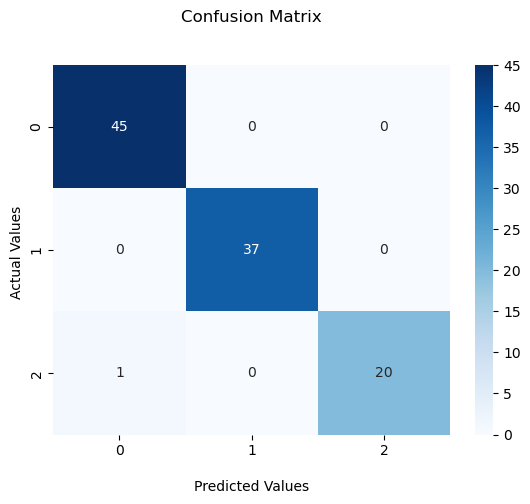

LogisticRegression F1_score Train: 1.0
LogisticRegression F1_score Test: 0.9903


In [26]:
cm = confusion_matrix(y_test, predictions_test)
ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f')
ax.set_title('Confusion Matrix\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')
plt.show()
f1_score_train = f1_score(y_train, predictions_train, average='micro').round(4)
f1_score_test = f1_score(y_test, predictions_test, average='micro').round(4)
print("LogisticRegression F1_score Train:", f1_score_train)
print("LogisticRegression F1_score Test:", f1_score_test)
metrics_dataframe = pd.concat([metrics_dataframe, pd.DataFrame.from_dict({'Description': ["KNN CLassifier"], 'F1_score TRAIN': [f1_score_train], 'F1_score TEST': [f1_score_test]})])

#### DecisionTreeClassifier

In [28]:
model = DecisionTreeClassifier(max_depth=6, min_samples_leaf=int(X_train.shape[0]*0.008))
model.fit(X_train, y_train)
predictions_test = model.predict(X_test)
predictions_train = model.predict(X_train)

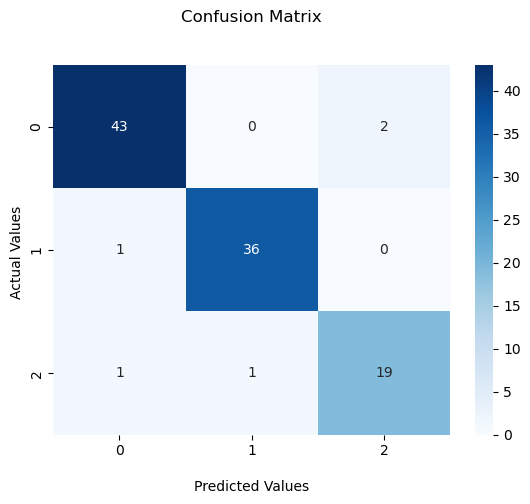

LogisticRegression F1_score Train: 1.0
LogisticRegression F1_score Test: 0.9515


In [29]:
cm = confusion_matrix(y_test, predictions_test)
ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f')
ax.set_title('Confusion Matrix\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')
plt.show()
f1_score_train = f1_score(y_train, predictions_train, average='micro').round(4)
f1_score_test = f1_score(y_test, predictions_test, average='micro').round(4)
print("LogisticRegression F1_score Train:", f1_score_train)
print("LogisticRegression F1_score Test:", f1_score_test)
metrics_dataframe = pd.concat([metrics_dataframe, pd.DataFrame.from_dict({'Description': ["DecisionTreeClassifier"], 'F1_score TRAIN': [f1_score_train], 'F1_score TEST': [f1_score_test]})])


#### SVM

In [31]:
model = SVC(kernel='rbf', probability=True)
model.fit(X_train_standardized, y_train)
predictions_test = model.predict(X_test_standardized)
predictions_train = model.predict(X_train_standardized)

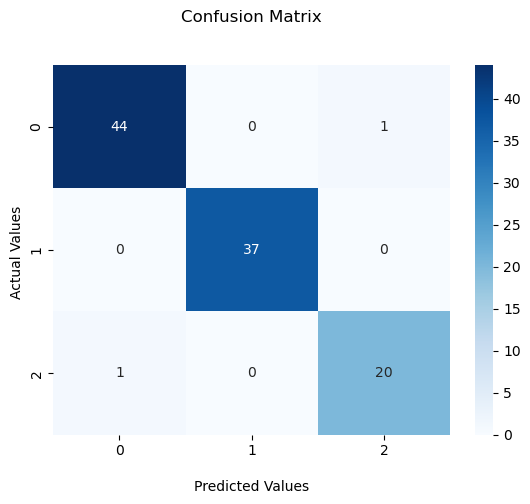

LogisticRegression F1_score Train: 0.9874
LogisticRegression F1_score Test: 0.9806


In [32]:
cm = confusion_matrix(y_test, predictions_test)
ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f')
ax.set_title('Confusion Matrix\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')
plt.show()
f1_score_train = f1_score(y_train, predictions_train, average='micro').round(4)
f1_score_test = f1_score(y_test, predictions_test, average='micro').round(4)
print("LogisticRegression F1_score Train:", f1_score_train)
print("LogisticRegression F1_score Test:", f1_score_test)
metrics_dataframe = pd.concat([metrics_dataframe, pd.DataFrame.from_dict({'Description': ["SVM"], 'F1_score TRAIN': [f1_score_train], 'F1_score TEST': [f1_score_test]})])


#### RandomForestClassifier

In [34]:
model = RandomForestClassifier(n_estimators=1000, max_depth=6, min_samples_leaf=int(X_train.shape[0]*0.008))
model.fit(X_train, y_train)
predictions_test = model.predict(X_test)
predictions_train = model.predict(X_train)

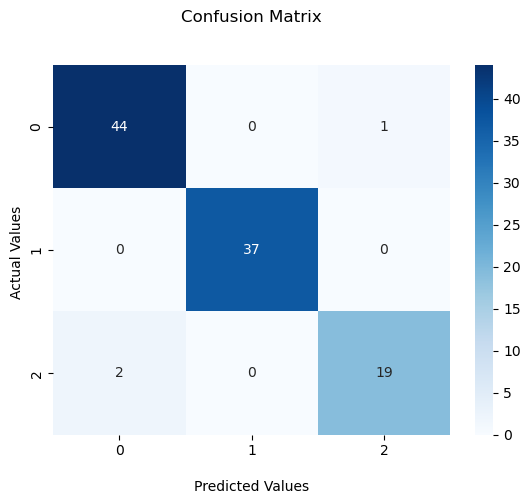

LogisticRegression F1_score Train: 1.0
LogisticRegression F1_score Test: 0.9709


In [35]:
cm = confusion_matrix(y_test, predictions_test)
ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f')
ax.set_title('Confusion Matrix\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')
plt.show()
f1_score_train = f1_score(y_train, predictions_train, average='micro').round(4)
f1_score_test = f1_score(y_test, predictions_test, average='micro').round(4)
print("LogisticRegression F1_score Train:", f1_score_train)
print("LogisticRegression F1_score Test:", f1_score_test)
metrics_dataframe = pd.concat([metrics_dataframe, pd.DataFrame.from_dict({'Description': ["RandomForestClassifier"], 'F1_score TRAIN': [f1_score_train], 'F1_score TEST': [f1_score_test]})])


#### AdaBoostClassifier

In [37]:
model = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3), n_estimators=20)
model.fit(X_train, y_train)
predictions_test = model.predict(X_test)
predictions_train = model.predict(X_train)

C:\Users\piotr\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


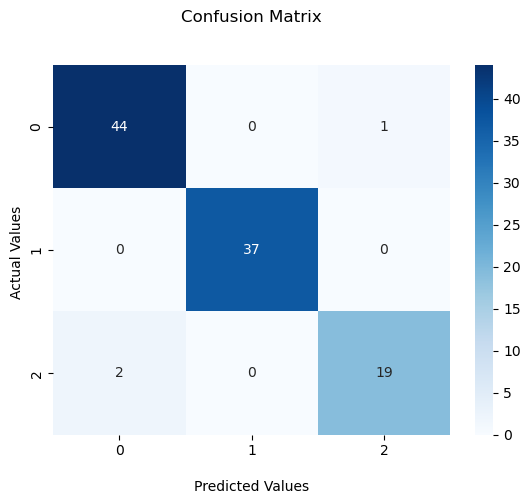

LogisticRegression F1_score Train: 1.0
LogisticRegression F1_score Test: 0.9709


In [38]:
cm = confusion_matrix(y_test, predictions_test)
ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f')
ax.set_title('Confusion Matrix\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')
plt.show()
f1_score_train = f1_score(y_train, predictions_train, average='micro').round(4)
f1_score_test = f1_score(y_test, predictions_test, average='micro').round(4)
print("LogisticRegression F1_score Train:", f1_score_train)
print("LogisticRegression F1_score Test:", f1_score_test)
metrics_dataframe = pd.concat([metrics_dataframe, pd.DataFrame.from_dict({'Description': ["AdaBoostClassifier"], 'F1_score TRAIN': [f1_score_train], 'F1_score TEST': [f1_score_test]})])


#### ensemble  - VotingClassifier

In [40]:
model_tree = DecisionTreeClassifier(max_depth=6, min_samples_leaf=int(X_train.shape[0]*0.008))
model_tree.fit(X_train, y_train)
model_forest = RandomForestClassifier(n_estimators=1000, max_depth=6, min_samples_leaf=int(X_train.shape[0]*0.008))
model_forest.fit(X_train, y_train)
model_adaboost = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3), n_estimators=20)
model_adaboost.fit(X_train, y_train)

model_voting = VotingClassifier(estimators=[('Tree', model_tree),
                                            ('Random Forest', model_forest),
                                            ('AdaBoost', model_adaboost)],
                                voting='soft')

model_voting.fit(X_train, y_train)
predictions_test = model_voting.predict(X_test)
predictions_train = model_voting.predict(X_train)

C:\Users\piotr\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\piotr\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


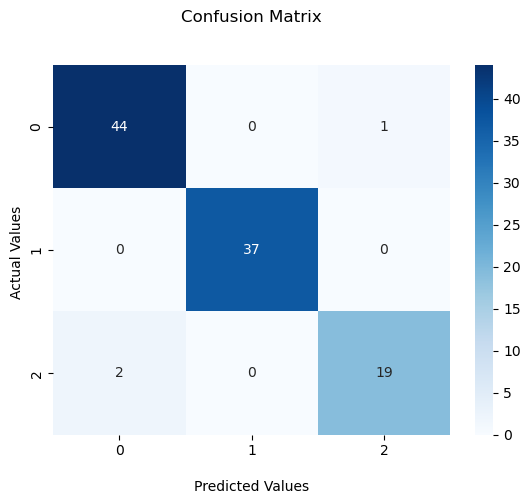

LogisticRegression F1_score Train: 1.0
LogisticRegression F1_score Test: 0.9709


In [41]:
cm = confusion_matrix(y_test, predictions_test)
ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f')
ax.set_title('Confusion Matrix\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')
plt.show()
f1_score_train = f1_score(y_train, predictions_train, average='micro').round(4)
f1_score_test = f1_score(y_test, predictions_test, average='micro').round(4)
print("LogisticRegression F1_score Train:", f1_score_train)
print("LogisticRegression F1_score Test:", f1_score_test)
metrics_dataframe = pd.concat([metrics_dataframe, pd.DataFrame.from_dict({'Description': ["VotingClassifier"], 'F1_score TRAIN': [f1_score_train], 'F1_score TEST': [f1_score_test]})])


#### GridSearch for RandomForestClassifier

In [43]:
random_forest = RandomForestClassifier(n_estimators=1000, n_jobs=-1)
params_rf = {'max_depth': [3, 5, 10, 20],
             'min_samples_leaf': [3, 5, 10, 15]}
rf_gridsearch = GridSearchCV(random_forest,
                             params_rf,
                             scoring='f1_micro',
                             cv=5,
                             verbose=10, n_jobs=-1)
rf_gridsearch.fit(X_train, y_train)
print('\nBest hyperparameter:', rf_gridsearch.best_params_)
rf_model_v2 = rf_gridsearch.best_estimator_

Fitting 5 folds for each of 16 candidates, totalling 80 fits

Best hyperparameter: {'max_depth': 20, 'min_samples_leaf': 3}


In [44]:
model = RandomForestClassifier(n_estimators=1000, max_depth=5, min_samples_leaf=3)
model.fit(X_train, y_train)
predictions_test = model.predict(X_test)
predictions_train = model.predict(X_train)

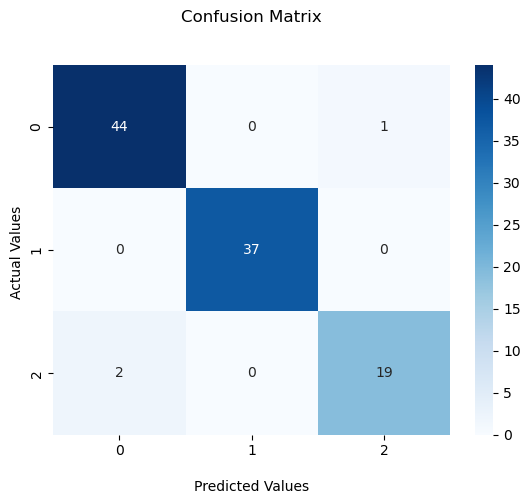

LogisticRegression F1_score Train: 0.9958
LogisticRegression F1_score Test: 0.9709


In [45]:
cm = confusion_matrix(y_test, predictions_test)
ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f')
ax.set_title('Confusion Matrix\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')
plt.show()
f1_score_train = f1_score(y_train, predictions_train, average='micro').round(4)
f1_score_test = f1_score(y_test, predictions_test, average='micro').round(4)
print("LogisticRegression F1_score Train:", f1_score_train)
print("LogisticRegression F1_score Test:", f1_score_test)
metrics_dataframe = pd.concat([metrics_dataframe, pd.DataFrame.from_dict({'Description': ["RandomForestClass+GridSearch"], 'F1_score TRAIN': [f1_score_train], 'F1_score TEST': [f1_score_test]})])


In [46]:
metrics_dataframe

,Description,F1_score TRAIN,F1_score TEST
0,LogisticRegression,0.9958,0.9709
0,KNN CLassifier,1.0000,0.9903
0,DecisionTreeClassifier,1.0000,0.9515
0,SVM,0.9874,0.9806
0,RandomForestClassifier,1.0000,0.9709
0,AdaBoostClassifier,1.0000,0.9709
0,VotingClassifier,1.0000,0.9709
0,RandomForestClass+GridSearch,0.9958,0.9709


#### PODSUMOWANIE - Z powyższego zestawienia wynika że najlepsze wyniki dla zbioru testowego udało się uzyskać dla modelu KNN, który uzyskał F1_score na poziomie 0,9903. Pozostałe modele również bardzo dobrze poradziły sobie z klasyfikacją pingwinów do odpowiednich grup i najniższy uzyskany wynik to 0,9515 dla Decision tree clasifier, co nadal jest świetnym wynikiem. 
#### Na podstawie confusion matrix dla poszczególnych modeli oraz dla histogramów które zostały przygotowane podczas wstępnej analizy można stwierdzić, że pingwiny z grupy 1 były klasyfikowane w soposób najdokładnieszy a najwiecej błedów zdarzało się przy klasyfikowaniu pingwinów z grupy 0 do 2 i odwrotnie. Przyczyną tego stanu rzeczy jest to że aż w 3/4 kolumnach widzimy dane dla grupy 1 które znaczaco różnią się od pozostałych natomiast tylko jedna kolumna z 4 (CulmenLength) przedstawia wyraźną róznicę pomiedzy grupą 0 a grupami 1 i 2 . Niestety rozkład danych z grupy 0 (dla wyższych wartości) lekko pokrywa się z rozkładami grup 1 i 2 (mniejsze wartości) przez co modele nie są w stanie bezbłędnie okreslić kategorii. 